In [36]:
#import required libraries
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-white')
# cvxopt library to solve quadratic optimization problems
import cvxopt                                            
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

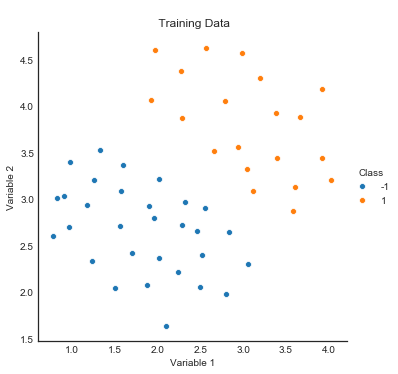

In [37]:
#Read sample data for Hard Margin SVM Training
test_data = pd.read_excel('Data1.xlsx')
X = np.array(test_data[['Variable 1','Variable 2']].copy()).reshape(-1,2)
y = np.array(test_data[['Class']].copy()).reshape(-1,1)
f = sns.pairplot(x_vars=["Variable 1"], y_vars=["Variable 2"], data=test_data, hue="Class", height=5)
plt.title("\n Training Data")
plt.savefig('train.png',dpi=150,bbox_inches='tight')

In [38]:
#Initializing values and computing Hessian matrix
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

In [39]:
#Converting the problem in cvxopt formulation
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters and tolerance
cvxopt_solvers.options['show_progress'] = True
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -9.8635e+00 -1.8817e+01  1e+02  1e+01  2e+00
 1: -1.5021e+01 -1.0777e+01  2e+01  2e+00  3e-01
 2: -1.2100e+01 -9.6312e+00  1e+01  9e-01  1e-01
 3: -8.2568e+00 -8.0984e+00  2e+00  1e-01  2e-02
 4: -7.9274e+00 -7.9429e+00  4e-02  1e-03  2e-04
 5: -7.9397e+00 -7.9399e+00  4e-04  1e-05  2e-06
 6: -7.9398e+00 -7.9398e+00  4e-06  1e-07  2e-08
 7: -7.9398e+00 -7.9398e+00  4e-08  1e-09  2e-10
 8: -7.9398e+00 -7.9398e+00  4e-10  1e-11  2e-12
Optimal solution found.


In [40]:
#finding Support vectors and parameters for decision function
S = (alphas > 1e-4).flatten()
sv = X[S]
print ("%d support vectors out of %d sample points found :" % (len(sv), len(X)))
print(sv)
w = ((y * alphas).T @ X).reshape(-1,1)
b = y[S] - np.dot(X[S], w)
print("The weights for decision function are :" ,w.flatten())
print("The intercept for decision function is :" ,b[0])

3 support vectors out of 50 sample points found :
[[3.1148 3.0809]
 [1.9282 4.0634]
 [2.5503 2.8967]]
The weights for decision function are : [2.54140955 3.0693502 ]
The intercept for decision function is : [-16.37234352]


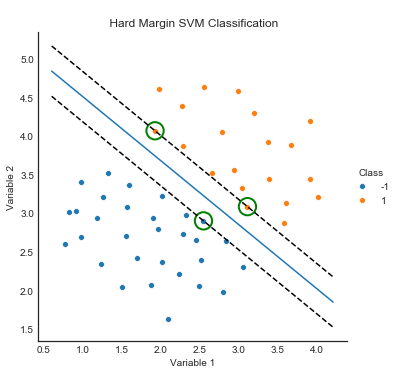

In [41]:
#plot the decision function and margins for the trained SVM on given data.
sns.pairplot(x_vars=["Variable 1"], y_vars=["Variable 2"], data=test_data, hue="Class", height=5)
ax = plt.gca()
xlim = ax.get_xlim()
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - b[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (b[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (b[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.scatter(sv[:,0],sv[:,1],color = 'green',s=300, linewidth=2, facecolors='none')
plt.title("\n Hard Margin SVM Classification")
plt.savefig("SVM.png",dpi=150,bbox_inches='tight')

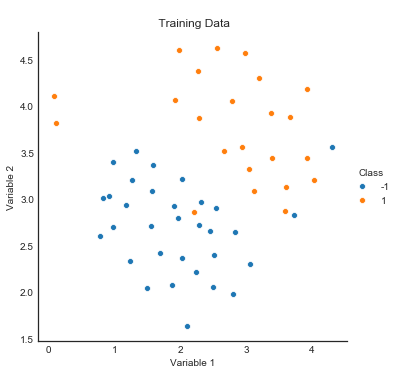

In [42]:
# Read sample data for soft margin SVM training by using C as regularization parameter
test_data2 = pd.read_excel('Data2.xlsx')
X = np.array(test_data2[['Variable 1','Variable 2']].copy()).reshape(-1,2)
y = np.array(test_data2[['Class']].copy()).reshape(-1,1)
f = sns.pairplot(x_vars=["Variable 1"], y_vars=["Variable 2"], data=test_data2, hue="Class", height=5)
plt.title("\n Training Data")
plt.savefig('train_c.png',dpi=150,bbox_inches='tight')

In [43]:
#Initializing values and computing Hessian matrix. Please note regularization parameter "C" for soft margin SVM. 
C =1
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])


     pcost       dcost       gap    pres   dres
 0: -2.1039e+01 -1.2166e+02  5e+02  3e+00  4e-14
 1: -1.3384e+01 -7.5093e+01  9e+01  2e-01  3e-14
 2: -1.3340e+01 -2.2498e+01  1e+01  2e-02  3e-14
 3: -1.5825e+01 -1.8128e+01  2e+00  4e-03  2e-14
 4: -1.6528e+01 -1.7092e+01  6e-01  6e-04  3e-14
 5: -1.6681e+01 -1.6869e+01  2e-01  1e-04  3e-14
 6: -1.6741e+01 -1.6797e+01  6e-02  3e-05  3e-14
 7: -1.6767e+01 -1.6769e+01  2e-03  5e-07  3e-14
 8: -1.6768e+01 -1.6768e+01  3e-05  6e-09  3e-14
 9: -1.6768e+01 -1.6768e+01  3e-07  6e-11  3e-14
10: -1.6768e+01 -1.6768e+01  3e-09  6e-13  3e-14
11: -1.6768e+01 -1.6768e+01  3e-11  6e-15  3e-14
Optimal solution found.


In [44]:
#finding Support vectors and parameters for decision function
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-1).flatten()
sv = X[S]
b = y[S] - np.dot(X[S], w)
print ("%d support vectors out of %d sample points found :" % (len(sv), len(X)))
print(sv)
print("The weights for decision function are :" ,w.flatten())
print("The intercept for decision function is :" ,b[0])


20 support vectors out of 55 sample points found :
[[2.9421 3.5619]
 [3.5872 2.8669]
 [2.2134 2.8541]
 [3.3914 3.4391]
 [0.1103 3.8129]
 [0.0864 4.1045]
 [3.1148 3.0809]
 [2.6655 3.5108]
 [3.6102 3.1321]
 [3.0457 3.3265]
 [1.5941 3.3675]
 [2.0203 3.2139]
 [2.3199 2.9684]
 [2.8383 2.6409]
 [0.9835 3.3981]
 [1.2618 3.2037]
 [3.7239 2.831 ]
 [1.3291 3.5209]
 [2.5503 2.8967]
 [4.3111 3.5628]]
The weights for decision function are : [0.7237723  1.94840487]
The intercept for decision function is : [-8.06943381]


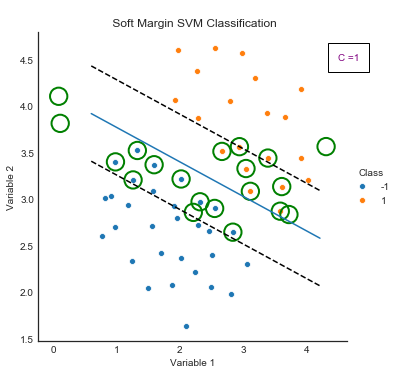

In [45]:
#plot the decision function and margins for the trained SVM on given data.
sns.pairplot(x_vars=["Variable 1"], y_vars=["Variable 2"], data=test_data, hue="Class", height=5)
ax = plt.gca()
xlim = ax.get_xlim()
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - b[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (b[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (b[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.scatter(sv[:,0],sv[:,1],color = 'green',s=300, linewidth=2, facecolors='none')
plt.title('\n Soft Margin SVM Classification')
ax.text(4.5, 4.5, 'C ='+str(C), color='purple', 
        bbox=dict(facecolor='none', edgecolor='black', pad=10.0))
plt.savefig("SVM_c"+str(C)+".png",dpi=150,bbox_inches='tight')